In [1]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    Flatten,
    Dropout,
    MaxPooling2D,
    Activation,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = "cats_and_dogs"

train_dir = os.path.join(PATH, "train")
validation_dir = os.path.join(PATH, "validation")
test_dir = os.path.join(PATH, "test")

total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [3]:
train_image_generator = ImageDataGenerator(rescale=1.0 / 255)
validation_image_generator = ImageDataGenerator(rescale=1.0 / 255)
test_image_generator = ImageDataGenerator(rescale=1.0 / 255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=batch_size
)
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=batch_size
)
test_data_gen = test_image_generator.flow_from_directory(
    test_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), shuffle=False, batch_size=batch_size
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


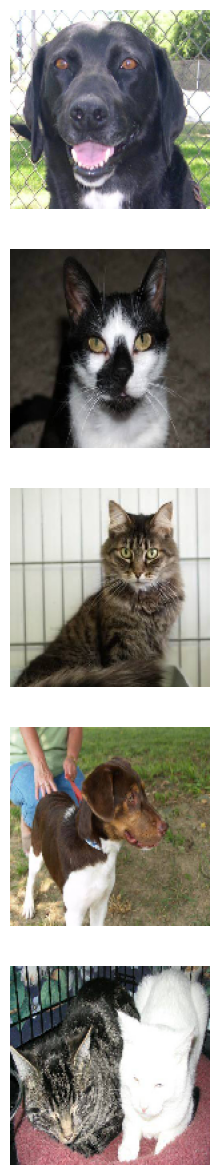

In [4]:
def plotImages(images_arr, probabilities=False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5, len(images_arr) * 3))
    if probabilities is False:
        for img, ax in zip(images_arr, axes):
            ax.imshow(img)
            ax.axis("off")
    else:
        for img, probability, ax in zip(images_arr, probabilities, axes):
            ax.imshow(img)
            ax.axis("off")
            if probability > 0.5:
                ax.set_title("%.2f" % (probability * 100) + "% dog")
            else:
                ax.set_title("%.2f" % ((1 - probability) * 100) + "% cat")
    plt.show()


sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [5]:
train_image_generator = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.4, 1.5],
    zoom_range=0.3,
    rescale=1.0 / 255,
)

Found 2000 images belonging to 2 classes.


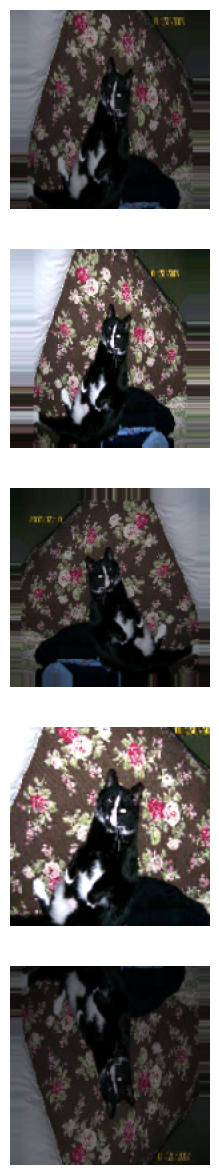

In [6]:
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode="binary",
)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation("sigmoid"))

model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

In [13]:
history = model.fit(
    train_data_gen, epochs=epochs, validation_data=val_data_gen, batch_size=batch_size
)

Epoch 1/15
16/16 [==============================] - ETA: 0s - loss: 0.2512 - accuracy: 0.4810

InvalidArgumentError: Graph execution error:

Detected at node Squeeze defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\makro\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\makro\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "C:\Users\makro\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start

  File "C:\Users\makro\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\makro\.conda\envs\research_project\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\Users\makro\.conda\envs\research_project\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\Users\makro\.conda\envs\research_project\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\makro\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue

  File "C:\Users\makro\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 502, in process_one

  File "C:\Users\makro\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell

  File "C:\Users\makro\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "C:\Users\makro\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\makro\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 540, in run_cell

  File "C:\Users\makro\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell

  File "C:\Users\makro\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell

  File "C:\Users\makro\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\makro\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async

  File "C:\Users\makro\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes

  File "C:\Users\makro\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code

  File "C:\Users\makro\AppData\Local\Temp\ipykernel_9460\197063918.py", line 1, in <module>

  File "c:\Users\makro\.conda\envs\research_project\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\makro\.conda\envs\research_project\Lib\site-packages\keras\src\engine\training.py", line 1856, in fit

  File "c:\Users\makro\.conda\envs\research_project\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\makro\.conda\envs\research_project\Lib\site-packages\keras\src\engine\training.py", line 2296, in evaluate

  File "c:\Users\makro\.conda\envs\research_project\Lib\site-packages\keras\src\engine\training.py", line 4108, in run_step

  File "c:\Users\makro\.conda\envs\research_project\Lib\site-packages\keras\src\engine\training.py", line 2066, in test_function

  File "c:\Users\makro\.conda\envs\research_project\Lib\site-packages\keras\src\engine\training.py", line 2049, in step_function

  File "c:\Users\makro\.conda\envs\research_project\Lib\site-packages\keras\src\engine\training.py", line 2037, in run_step

  File "c:\Users\makro\.conda\envs\research_project\Lib\site-packages\keras\src\engine\training.py", line 1920, in test_step

  File "c:\Users\makro\.conda\envs\research_project\Lib\site-packages\keras\src\engine\training.py", line 1249, in compute_metrics

  File "c:\Users\makro\.conda\envs\research_project\Lib\site-packages\keras\src\engine\compile_utils.py", line 620, in update_state

  File "c:\Users\makro\.conda\envs\research_project\Lib\site-packages\keras\src\utils\metrics_utils.py", line 77, in decorated

  File "c:\Users\makro\.conda\envs\research_project\Lib\site-packages\keras\src\metrics\base_metric.py", line 140, in update_state_fn

  File "c:\Users\makro\.conda\envs\research_project\Lib\site-packages\keras\src\metrics\base_metric.py", line 723, in update_state

  File "c:\Users\makro\.conda\envs\research_project\Lib\site-packages\keras\src\metrics\accuracy_metrics.py", line 459, in sparse_categorical_accuracy

  File "c:\Users\makro\.conda\envs\research_project\Lib\site-packages\keras\src\utils\metrics_utils.py", line 961, in sparse_categorical_matches

Can not squeeze dim[1], expected a dimension of 1, got 2
	 [[{{node Squeeze}}]] [Op:__inference_test_function_6026]

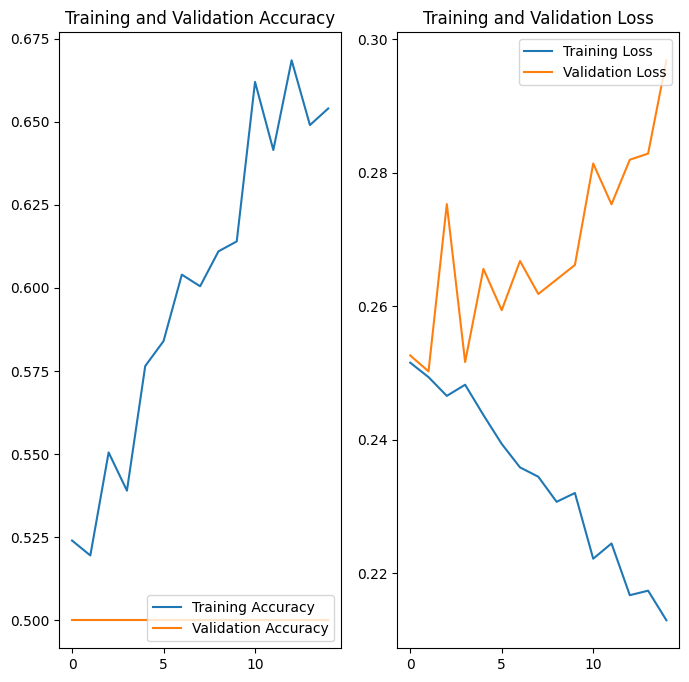

In [9]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

In [10]:
probabilities = model.predict(test_data_gen)
probabilities = np.array(probabilities).reshape(len(probabilities))
probabilities = probabilities.round().astype(np.int0)

1/1 [==============================] - 0s 193ms/step


C:\Users\makro\AppData\Local\Temp\ipykernel_9460\3435492255.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  probabilities = probabilities.round().astype(np.int0)


In [11]:
answers = [
    1,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    1,
    0,
    1,
    0,
    1,
    1,
    0,
    1,
    1,
    0,
    0,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    1,
    1,
    1,
    1,
    0,
    1,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
]

correct = 0

for probability, answer in zip(probabilities, answers):
    if round(probability) == answer:
        correct += 1

percentage_identified = correct / len(answers)

passed_challenge = percentage_identified > 0.63

print(
    f"Your model correctly identified {round(percentage_identified, 4)*100}% of the images of cats and dogs."
)

if passed_challenge:
    print("You passed the challenge!")
else:
    print(
        "You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!"
    )

Your model correctly identified 60.0% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!
